In [ ]:
!pip install pybithumb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 465 kB/s 
     |████████████████████████████████| 112 kB 15.9 MB/s 
     |████████████████████████████████| 251 kB 34.8 MB/s 


In [ ]:
import pybithumb

In [ ]:
crypto = "ETH"

In [ ]:
# Get the last 7 days (168 hours) of Ethereum data
df = pybithumb.get_candlestick(crypto, chart_intervals="1h")
df = df.tail(168)
df

,open,high,low,close,volume
time,,,,,
2022-07-17 07:00:00,1772000.0,1788000.0,1762000.0,1786000.0,673.346772
2022-07-17 08:00:00,1786000.0,1789000.0,1771000.0,1781000.0,665.278125
2022-07-17 09:00:00,1781000.0,1820000.0,1779000.0,1792000.0,1764.201736
2022-07-17 10:00:00,1793000.0,1798000.0,1747000.0,1760000.0,1135.720254
2022-07-17 11:00:00,1760000.0,1776000.0,1756000.0,1767000.0,728.493829
...,...,...,...,...,...
2022-07-24 02:00:00,2014000.0,2019000.0,1985000.0,1994000.0,2780.671217
2022-07-24 03:00:00,1992000.0,2011000.0,1980000.0,1993000.0,1592.214181
2022-07-24 04:00:00,1993000.0,2012000.0,1983000.0,2008000.0,1888.651772


In [ ]:
df = df.reset_index()

# Get time (a) and close price (b)
df['ds'] = df['time']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-07-17 07:00:00,1786000.0
1,2022-07-17 08:00:00,1781000.0
2,2022-07-17 09:00:00,1792000.0
3,2022-07-17 10:00:00,1760000.0
4,2022-07-17 11:00:00,1767000.0
...,...,...
163,2022-07-24 02:00:00,1994000.0
164,2022-07-24 03:00:00,1993000.0
165,2022-07-24 04:00:00,2008000.0
166,2022-07-24 05:00:00,2022000.0


In [ ]:
from fbprophet import Prophet

In [ ]:
# Machine Learning
ai = Prophet()
ai.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
# Predict the next 24 hours of Ethereum price
prediction = ai.make_future_dataframe(periods=24, freq='H')
analysis = ai.predict(prediction)

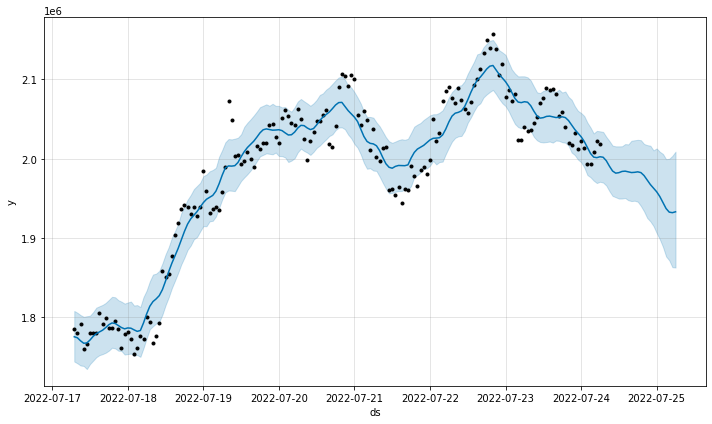

In [ ]:
graph1 = ai.plot(analysis)

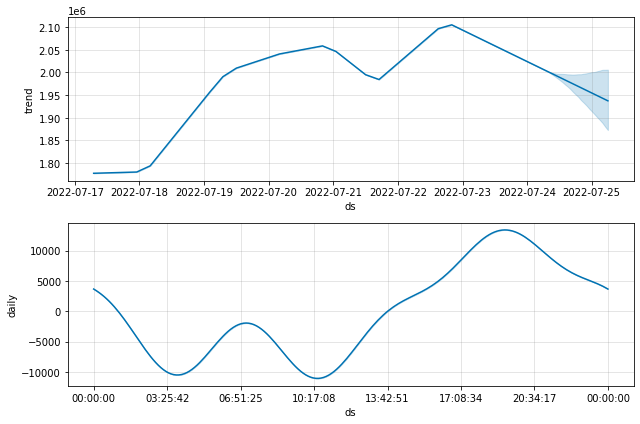

In [ ]:
graph2 = ai.plot_components(analysis)

In [ ]:
# vrn is value of the cryptocurrency right now
vrn = pybithumb.get_current_price(crypto)
vrn

2015000.0

In [ ]:
# Find close price before 00:00 a.m.
close_price = analysis[analysis['ds'] == analysis.iloc[-1]['ds'].replace(hour=9)]

# Find close price after 00:00 a.m.
if len(close_price) == 0:
  close_price = analysis[analysis['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

# vcp is value of close price.
vcp = close_price['yhat'].values[0]
vcp

1990640.939905526

In [ ]:
# Conclusion of analysis
print("Value of " + crypto + " right now" + " is " + str(vrn))
print("Value of " + crypto + " at close price" + " is " + str(vcp))

Value of ETH right now is 2015000.0
Value of ETH at close price is 1990640.939905526
